In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense
from pathlib import Path
from tensorflow.keras.preprocessing import image
import random 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, MaxPool2D, Dropout

In [20]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [21]:
n_pics = load_images('D:\\SEM 6\\Deep  Learning Lab\\Concrete Crack Images-DS\\Negative')

print(len(n_pics))

20000


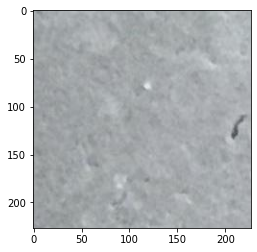

In [22]:
plt.imshow(n_pics[0])

In [23]:
p_pics = load_images('D:\\SEM 6\\Deep  Learning Lab\\Concrete Crack Images-DS\\Positive')

print(len(p_pics))

20000


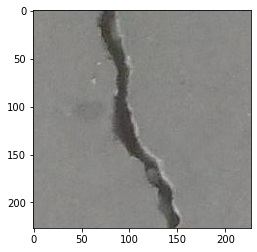

In [24]:
plt.imshow(p_pics[0])

In [25]:
my_seed = 0
np.random.seed(my_seed)

random.seed(my_seed)
tf.random.set_seed(my_seed)

In [27]:
data_dir_train='D:\\SEM 6\\Deep  Learning Lab\\Concrete Crack Images-DS'

In [44]:
batch_size = 256
img_height = 227
img_width = 227

In [45]:
#train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40000 files belonging to 2 classes.
Using 32000 files for training.


In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


In [47]:
class_names = train_ds.class_names
print(class_names)

['Negative', 'Positive']


In [48]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True,
        validation_split=0.20)

training_set = train_datagen.flow_from_directory(data_dir_train,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',subset='training')

val_set = train_datagen.flow_from_directory(data_dir_train,
                                          target_size = (img_height, img_width),
                                          batch_size = batch_size,
                                          class_mode = 'categorical',subset='validation')

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [49]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(3,3), padding="same",activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=15, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=20, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 227, 227, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 113, 113, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 113, 113, 15)      1365      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 15)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 20)        2720      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 20)      

In [50]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
epochs = 5

history = model.fit(training_set,validation_data=val_set,epochs=epochs)

Epoch 1/5
125/125 [==============================] - 1004s 8s/step - loss: 0.0525 - accuracy: 0.9847 - val_loss: 0.0561 - val_accuracy: 0.9810
Epoch 2/5
125/125 [==============================] - 869s 7s/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0165 - val_accuracy: 0.9951
Epoch 3/5
125/125 [==============================] - 890s 7s/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0232 - val_accuracy: 0.9915
Epoch 4/5
125/125 [==============================] - 935s 7s/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0166 - val_accuracy: 0.9948
Epoch 5/5
125/125 [==============================] - 814s 7s/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0148 - val_accuracy: 0.9956


In [56]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 125}

In [57]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.052480,0.984688,0.056123,0.981000
1,0.034769,0.989187,0.016535,0.995125
2,0.035418,0.989125,0.023194,0.991500
3,0.037459,0.988563,0.016564,0.994750
4,0.028856,0.990656,0.014801,0.995625


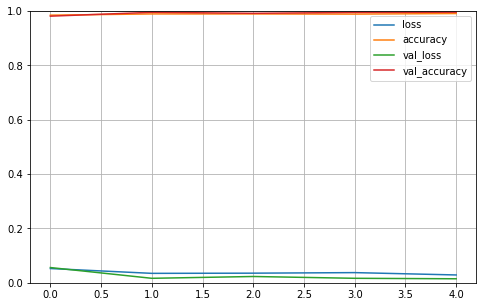

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#score = model1.evaluate(x_test, y_test)

In [ ]:

#print('Test Loss:', score[0])
#print('Test accuracy:', score[1])

#ccuracy1 = 100*score[1]
#print('Test accuracy: %.4f%%' % accuracy1)

In [59]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS_CAT"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [60]:
UNIQUE_PATH = model.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS_CAT\Model_2022_04_27_11_50_12_.h5


dropout

In [55]:
model1 = Sequential()
model1.add(Conv2D(filters=10, kernel_size=(3,3), padding="same",activation='relu', input_shape=(227, 227, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=15, kernel_size=(3,3),padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=20, kernel_size=(3,3), padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 227, 227, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 113, 113, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 113, 113, 15)      1365      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 15)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 20)        2720      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 20)      

In [61]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 5

history = model.fit(training_set,validation_data=val_set,epochs=epochs)

Epoch 1/5
125/125 [==============================] - 809s 6s/step - loss: 0.0347 - accuracy: 0.9899 - val_loss: 0.0129 - val_accuracy: 0.9954
Epoch 2/5
125/125 [==============================] - 791s 6s/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0159 - val_accuracy: 0.9951
Epoch 3/5
 35/125 [=======>......................] - ETA: 8:05 - loss: 0.0213 - accuracy: 0.9914

In [ ]:
history1.params

In [ ]:
pd.DataFrame(history1.history)